In [13]:
from stompy.grid import multi_ugrid, unstructured_grid
import glob, os
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
out_dir="/home/rustyh/sandbox/csc/dflowfm/runs/test_waq_20190101/DFM_OUTPUT_flowfm"

In [3]:
paths=glob.glob(os.path.join(out_dir,'*_map.nc'))
#paths

In [4]:
mg=multi_ugrid.MultiUgrid(paths,cleanup_dfm=True)

INFO:UnstructuredGrid:Regenerating edges
INFO:UnstructuredGrid:Removing orphaned nodes
INFO:UnstructuredGrid:0 nodes found to be orphans
INFO:UnstructuredGrid:Removing duplicate nodes
INFO:UnstructuredGrid:Renumbering nodes
INFO:UnstructuredGrid:Renumbering edges
INFO:UnstructuredGrid:Extracting grid boundary
INFO:UnstructuredGrid:Regenerating edges
INFO:UnstructuredGrid:Removing orphaned nodes
INFO:UnstructuredGrid:0 nodes found to be orphans
INFO:UnstructuredGrid:Removing duplicate nodes
INFO:UnstructuredGrid:Renumbering nodes
INFO:UnstructuredGrid:Renumbering edges
INFO:UnstructuredGrid:Extracting grid boundary
INFO:UnstructuredGrid:Regenerating edges
INFO:UnstructuredGrid:Removing orphaned nodes
INFO:UnstructuredGrid:0 nodes found to be orphans
INFO:UnstructuredGrid:Removing duplicate nodes
INFO:UnstructuredGrid:Renumbering nodes
INFO:UnstructuredGrid:Renumbering edges
INFO:UnstructuredGrid:Extracting grid boundary
INFO:UnstructuredGrid:Regenerating edges
INFO:UnstructuredGrid:Remo

<IPython.core.display.Javascript object>


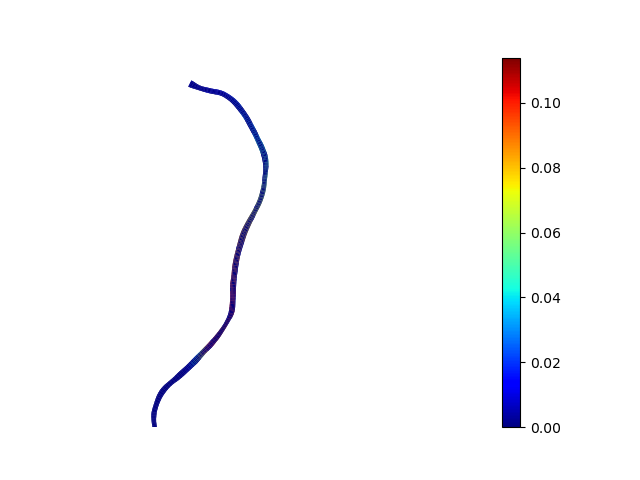

(602107.054445, 636382.052455, 4211562.3191486625, 4297722.78564054)

In [5]:
scal=mg['mesh2d_NO3'].isel(time=-1).values
plt.figure()
ccoll=mg.grid.plot_cells(values=scal,cmap='jet')
plt.colorbar(ccoll)
plt.axis('equal')
plt.axis('off')

In [6]:
age_conc=mg['mesh2d_NO3'].isel(time=-1).values
conc=mg['mesh2d_RcNit'].isel(time=-1).values

age=age_conc/conc


/home/rustyh/miniconda3/envs/general/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


<IPython.core.display.Javascript object>


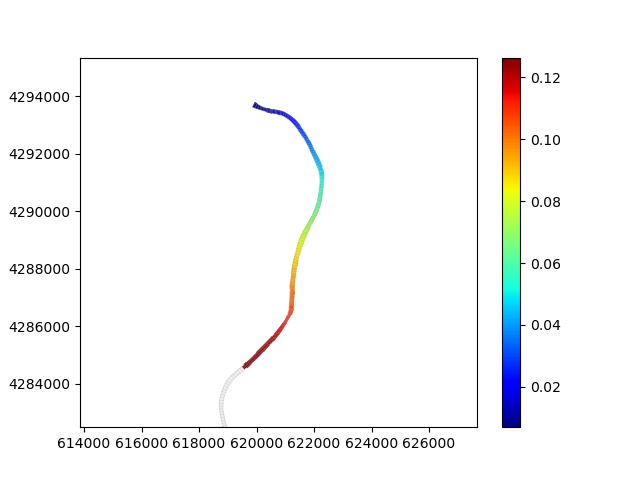

(602107.054445, 636382.052455, 4211562.3191486625, 4297722.78564054)

In [16]:
plt.figure()
valid=conc>0.0001
age[~valid]=0
ccoll=mg.grid.plot_cells(values=age,cmap='jet',mask=valid)
mg.grid.plot_edges(color='k',lw=0.4,alpha=0.1)
#ccoll.set_clim([0,0.05])
plt.colorbar(ccoll)
plt.axis('equal')